In [15]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from itertools import cycle, islice

from scipy import interp

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import auc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
%matplotlib inline

In [3]:
hf_df=pd.read_csv(r'C:\Users\muthukumar\Desktop\005_SaveNWBCSHere\03_Activities&HW\Project_3\BC_Data\HF.csv')
hf_df = hf_df.dropna()
#hf_df.head()

In [4]:
hf_df = hf_df.apply(pd.to_numeric)
hf_df['age'] = hf_df['age'].astype('int64')
hf_df['platelets'] = hf_df['platelets'].astype('int64')
hf_df['serum_creatinine'] = hf_df['serum_creatinine'].astype('int64')
#hf_df.info()

In [5]:
features=hf_df.loc[:,hf_df.columns!='DEATH_EVENT'].values[:,1:]
target=hf_df.loc[:,'DEATH_EVENT'].values

In [6]:
features

array([[   0,  582,    0, ...,    1,    0,    4],
       [   0, 7861,    0, ...,    1,    0,    6],
       [   0,  146,    0, ...,    1,    1,    7],
       ...,
       [   0, 2060,    1, ...,    0,    0,  278],
       [   0, 2413,    0, ...,    1,    1,  280],
       [   0,  196,    0, ...,    1,    1,  285]], dtype=int64)

In [7]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [8]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=target

In [9]:
x
#len(x)

array([[-1.        , -0.85736157, -1.        , ...,  1.        ,
        -1.        , -1.        ],
       [-1.        ,  1.        , -1.        , ...,  1.        ,
        -1.        , -0.98576512],
       [-1.        , -0.96861444, -1.        , ...,  1.        ,
         1.        , -0.97864769],
       ...,
       [-1.        , -0.48022455,  1.        , ..., -1.        ,
        -1.        ,  0.95017794],
       [-1.        , -0.39015055, -1.        , ...,  1.        ,
         1.        ,  0.96441281],
       [-1.        , -0.95585609, -1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [10]:
y
len(y)

299

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [44]:
#use_label_encoder =False

In [12]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
encoded_y = label_encoder.transform(y_test)
encoded_y
len(encoded_y)

90

In [16]:
# Build XGB model

xgb_model=XGBClassifier()
#xgb_model.fit(x_train,y_train)
xgb_model.fit(x_train, y_train, eval_set= [(x_train, y_train),(x_test, y_test)], eval_metric='auc', early_stopping_rounds=20, verbose=True) 
target_pred_xgb=xgb_model.predict(x_test)
xgb_score = xgb_model.score(x_test, encoded_y)
print(xgb_score)
print("\n")
print('Accuracy of the prediction using XGBClassifier:' + str(accuracy_score(encoded_y, target_pred_xgb)*100))
print("\n")
# Death_Event 0 -not-fatal, 1-fatal
print('Classification Report of XGBClassifier:' + "\n" + "\n"+ classification_report(y_test, target_pred_xgb))

[0]	validation_0-auc:0.94749	validation_1-auc:0.86123
[1]	validation_0-auc:0.98387	validation_1-auc:0.88800
[2]	validation_0-auc:0.98102	validation_1-auc:0.88646
[3]	validation_0-auc:0.98632	validation_1-auc:0.88646
[4]	validation_0-auc:0.98816	validation_1-auc:0.88831
[5]	validation_0-auc:0.99178	validation_1-auc:0.88892
[6]	validation_0-auc:0.99536	validation_1-auc:0.88062
[7]	validation_0-auc:0.99714	validation_1-auc:0.88000
[8]	validation_0-auc:0.99775	validation_1-auc:0.88615
[9]	validation_0-auc:0.99888	validation_1-auc:0.88492
[10]	validation_0-auc:0.99888	validation_1-auc:0.89908
[11]	validation_0-auc:0.99959	validation_1-auc:0.90215
[12]	validation_0-auc:0.99969	validation_1-auc:0.90215
[13]	validation_0-auc:0.99969	validation_1-auc:0.90031
[14]	validation_0-auc:0.99969	validation_1-auc:0.90215
[15]	validation_0-auc:0.99969	validation_1-auc:0.90646
[16]	validation_0-auc:1.00000	validation_1-auc:0.90092
[17]	validation_0-auc:1.00000	validation_1-auc:0.90031
[18]	validation_0-au

C:\Users\muthukumar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[27]	validation_0-auc:1.00000	validation_1-auc:0.90092
[28]	validation_0-auc:1.00000	validation_1-auc:0.90092
[29]	validation_0-auc:1.00000	validation_1-auc:0.90092
[30]	validation_0-auc:1.00000	validation_1-auc:0.89908
[31]	validation_0-auc:1.00000	validation_1-auc:0.89908
[32]	validation_0-auc:1.00000	validation_1-auc:0.90154
[33]	validation_0-auc:1.00000	validation_1-auc:0.90154
[34]	validation_0-auc:1.00000	validation_1-auc:0.90154
[35]	validation_0-auc:1.00000	validation_1-auc:0.90338
[36]	validation_0-auc:1.00000	validation_1-auc:0.90338
[37]	validation_0-auc:1.00000	validation_1-auc:0.90215
[38]	validation_0-auc:1.00000	validation_1-auc:0.90154
[39]	validation_0-auc:1.00000	validation_1-auc:0.90092
0.8444444444444444


Accuracy of the prediction using XGBClassifier:84.44444444444444


Classification Report of XGBClassifier:

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        65
           1       0.74      0.68      0.71    

In [17]:
orig_features_hf=['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time','DEATH_EVENT']
xgb_model.get_booster().feature_names = orig_features_hf

<Figure size 1800x1800 with 0 Axes>

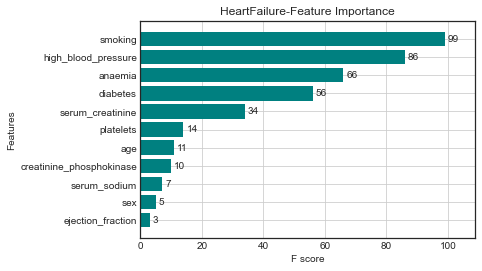

In [18]:
# Data exploration - most important for the model
fig1 = plt.figure(figsize=(25,25))
plt.style.use('seaborn-white')
plot_importance(xgb_model, grid=True, show_values=True,height=0.8, color='teal',title = 'HeartFailure-Feature Importance')

plt.savefig("HF_FtrImp.png",bbox_inches='tight',format="png")
plt.show()
plt.close()

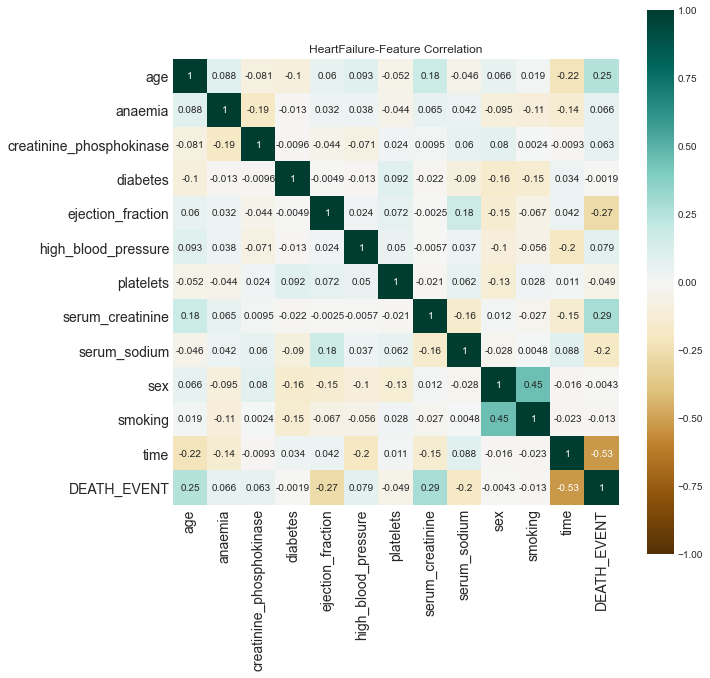

In [20]:
fig2 = plt.figure(figsize=(10,10))
corr = hf_df.loc[:,hf_df.dtypes == 'int64'].corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, square = True,cmap=sns.diverging_palette(225, 36, as_cmap=True))
plt.title("HeartFailure-Feature Correlation")
sns.heatmap(hf_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', square=True)
plt.tick_params(axis='both', which='major', labelsize=14)
fig2.savefig("HF_FtrCorr.png",bbox_inches='tight',format='png')

In [21]:
# Build SVC model

svc_model=svm.SVC(random_state=0)
svc_model.fit(x_train, y_train) 
target_pred_svc=svc_model.predict(x_test)
svc_score = svc_model.score(x_test, y_test)

print('Accuracy of the prediction using SVC:' + str(accuracy_score(encoded_y, target_pred_svc)*100))
print("\n")
print('Classification Report of SVC:' + "\n" + "\n"+ classification_report(y_test, target_pred_svc))

Accuracy of the prediction using SVC:83.33333333333334


Classification Report of SVC:

              precision    recall  f1-score   support

           0       0.82      0.98      0.90        65
           1       0.92      0.44      0.59        25

    accuracy                           0.83        90
   macro avg       0.87      0.71      0.74        90
weighted avg       0.85      0.83      0.81        90



In [22]:
#Training and fitting a RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=0)
rfc_model.fit(x_train, y_train)
target_pred_rfc = rfc_model.predict(x_test)
rfc_score=rfc_model.score(x_test,y_test)

print('Accuracy of the prediction using RandomForest Classifier:' + str(accuracy_score(y_test, target_pred_rfc)*100))
print("\n")
print('Classification Report of RandomForest Classifier:' + "\n" + "\n"+ classification_report(y_test, target_pred_rfc))

Accuracy of the prediction using RandomForest Classifier:88.88888888888889


Classification Report of RandomForest Classifier:

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        65
           1       0.86      0.72      0.78        25

    accuracy                           0.89        90
   macro avg       0.88      0.84      0.85        90
weighted avg       0.89      0.89      0.89        90



In [23]:
#Training and fitting a LogisticRegression

# Assign x2 (data) and y2 (target)
x2 = hf_df.drop("DEATH_EVENT", axis=1)
y2 = hf_df["DEATH_EVENT"]
print(x2.shape, y2.shape)

(299, 12) (299,)


In [24]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=1)

In [25]:
lgr_model = LogisticRegression(random_state=0)
lgr_model.fit(x2_train,y2_train)
#Validate the model using test data
print(f"Training Data Score: {lgr_model.score(x2_train, y2_train)}")
print(f"Testing Data Score: {lgr_model.score(x2_test, y2_test)}")

Training Data Score: 0.7991071428571429
Testing Data Score: 0.84


In [26]:
target_pred_lgr = lgr_model.predict(x2_test)
#Making predictions
print(f"First 10 Predictions by LogisticRegression(0 = Negative, 1 = Positive):   {target_pred_lgr[:10]}")
print(f"First 10 Actual labels(0 = Negative, 1 = Positive): {target_pred_lgr[:10].tolist()}")

First 10 Predictions by LogisticRegression(0 = Negative, 1 = Positive):   [0 0 0 0 0 0 0 1 1 0]
First 10 Actual labels(0 = Negative, 1 = Positive): [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]


In [206]:
pd.DataFrame({"Prediction using LogisticRegression": target_pred_lgr, "Actual ": y2_test}).reset_index(drop=True)

,Prediction using LogisticRegression,Actual
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
70,0,0
71,0,0
72,1,1
73,0,1


In [27]:
print('Percentage of Accuracy of the prediction using LogisticRegression Classifier:' + str(accuracy_score(y2_test, target_pred_lgr)*100))
print("\n")
print('Accuracy of prediction using logistic regression :{:.2f}'.format(lgr_model.score(x2_test, y2_test)))
print("\n")
print('Classification Report of LogisticRegression Classifier:' + "\n" + "\n"+ classification_report(y2_test, target_pred_lgr))

Percentage of Accuracy of the prediction using LogisticRegression Classifier:84.0


Accuracy of prediction using logistic regression :0.84


Classification Report of LogisticRegression Classifier:

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        55
           1       0.79      0.55      0.65        20

    accuracy                           0.84        75
   macro avg       0.82      0.75      0.77        75
weighted avg       0.83      0.84      0.83        75



In [28]:
# Confusion Matrix

conf_mtrx_xgb = confusion_matrix(y_test, target_pred_xgb)
conf_mtrx_rfc = confusion_matrix(y_test, target_pred_rfc)
conf_mtrx_svc = confusion_matrix(y_test, target_pred_svc)
#KNN used x1,y1
conf_mtrx_lgr = confusion_matrix(y2_test, target_pred_lgr)

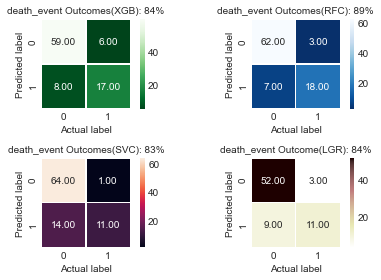

In [34]:

fig3, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=False)
fig3.WindowState = 'maximized'
#fig3 = plt.figure(figsize=(30,8))
axs[0,0].plot = sns.heatmap(conf_mtrx_xgb, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Greens_r', ax=axs[0,0])
axs[0,0].set_title(f'death_event Outcomes(XGB): {xgb_score:.0%}', size=10)
axs[0,1].plot = sns.heatmap(conf_mtrx_rfc, annot=True, fmt=".2f", linewidths=.5, square = True,cmap = 'Blues_r',ax=axs[0,1])
axs[0,1].set_title(f'death_event Outcomes(RFC): {rfc_score:.0%}', size=10)
axs[1,0].plot = sns.heatmap(conf_mtrx_svc, annot=True, fmt=".2f", linewidths=.5, square = True,ax=axs[1,0]);
axs[1,0].set_title(f'death_event Outcomes(SVC): {svc_score:.0%}', size=10)
axs[1,1].plot = sns.heatmap(conf_mtrx_lgr, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'pink_r',ax=axs[1,1])
axs[1,1].set_title(f'death_event Outcome(LGR): {lgr_model.score(x2_test, y2_test):.0%}', size=10)   

for ax in axs.flat:
    ax.set(xlabel='Actual label', ylabel='Predicted label')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.tight_layout()


fig3.savefig("HF_cnf_mtx.png")

In [330]:
# DataExploration visual

In [35]:
count_of_nondeath = len(hf_df[hf_df['DEATH_EVENT']==0])
count_of_death = len(hf_df[hf_df['DEATH_EVENT']==1])
pct_of_nondeath = count_of_nondeath/(count_of_nondeath+count_of_death)
print("percentage of no death event", pct_of_nondeath*100)
pct_of_death = count_of_death/(count_of_nondeath+count_of_death)
print("percentage of death event", pct_of_death*100)

#Before balance the classes,  some more exploration.

percentage of no death event 67.89297658862876
percentage of death event 32.10702341137124


In [36]:
hf_df.groupby(["DEATH_EVENT"]).mean()
# Time since visit is higher in non-fatal cases while it is lower in fatal cases. creatinine_phosphokinase is higher in fatal cases than non-fatal cases.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.758621,0.408867,540.054187,0.418719,40.26601,0.325123,266657.487685,0.763547,137.216749,0.650246,0.325123,158.339901
1,65.208333,0.479167,670.197917,0.416667,33.46875,0.406250,256381.041667,1.437500,135.375000,0.645833,0.312500,70.885417


In [220]:
#hf_df.groupby("creatinine_phosphokinase").mean()

In [222]:
#hf_df.groupby("time").mean()

In [310]:
#hf_df.groupby("age").mean()

In [37]:
hf_df.groupby("anaemia").mean()

,age,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
anaemia,,,,,,,,,,,,
0,59.923529,742.788235,0.423529,37.758824,0.335294,267082.211765,0.917647,136.464706,0.688235,0.364706,139.805882,0.294118
1,62.023256,369.736434,0.410853,38.511628,0.372093,258450.186047,1.062016,136.837209,0.596899,0.263566,117.682171,0.356589


In [38]:
hf_df.groupby(["high_blood_pressure","diabetes","smoking"]).mean()

age   anaemia  \
high_blood_pressure diabetes smoking                        
0                   0        0        62.830769  0.461538   
                             1        59.127660  0.319149   
                    1        0        57.333333  0.460317   
                             1        61.473684  0.368421   
1                   0        0        61.976744  0.488372   
                             1        64.947368  0.526316   
                    1        0        61.125000  0.468750   
                             1        62.727273  0.181818   

                                      creatinine_phosphokinase  \
high_blood_pressure diabetes smoking                             
0                   0        0                      528.569231   
                             1                      795.404255   
                    1        0                      679.095238   
                             1                      426.947368   
1                   0        0                      544.139535   
                             1                      393.578947   
                    1        0                      539.000000   
                             1                      291.818182   

                                      ejection_fraction      platelets  \
high_blood_pressure diabetes smoking                                     
0                   0        0                38.369231  249059.446154   
                             1                36.531915  256136.851064   
                    1        0                38.873016  270378.031746   
                             1                36.157895  270214.421053   
1                   0        0                38.348837  251327.302326   
                             1                40.789474  287492.526316   
                    1        0                39.062500  282721.062500   
                             1                33.272727  275668.909091   

                                      serum_creatinine  serum_sodium  \
high_blood_pressure diabetes smoking                                   
0                   0        0                1.015385    136.692308   
                             1                0.829787    136.744681   
                    1        0                1.095238    136.396825   
                             1                0.894737    135.631579   
1                   0        0                1.000000    137.395349   
                             1                1.368421    137.421053   
                    1        0                0.781250    135.812500   
                             1                0.727273    136.727273   

                                           sex        time  DEATH_EVENT  
high_blood_pressure diabetes smoking                                     
0                   0        0        0.569231  132.307692     0.384615  
                             1        1.000000  148.255319     0.191489  
                    1        0        0.492063  150.888889     0.253968  
                             1        0.947368  124.684211     0.368421  
1                   0        0        0.534884  119.046512     0.302326  
                             1        0.894737   83.842105     0.473684  
                    1        0        0.343750  108.281250     0.375000  
                             1        0.909091  120.727273     0.454545

In [39]:
hf_df.groupby("diabetes").mean()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
diabetes,,,,,,,,,,,,
0,61.850575,0.436782,589.752874,38.132184,0.356322,255728.321839,1.000,136.95977,0.712644,0.37931,128.045977,0.321839
1,59.408000,0.424000,570.824000,38.016000,0.344000,273978.576000,0.952,136.16000,0.560000,0.24000,133.344000,0.320000


In [40]:
hf_df.groupby("smoking").mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
smoking,,,,,,,,,,,,
0,60.674877,0.467980,580.226601,0.46798,38.630542,0.369458,261462.206897,1.0000,136.610837,0.502463,131.477833,0.325123
1,61.156250,0.354167,585.250000,0.31250,36.927083,0.312500,267366.895833,0.9375,136.656250,0.958333,127.687500,0.312500


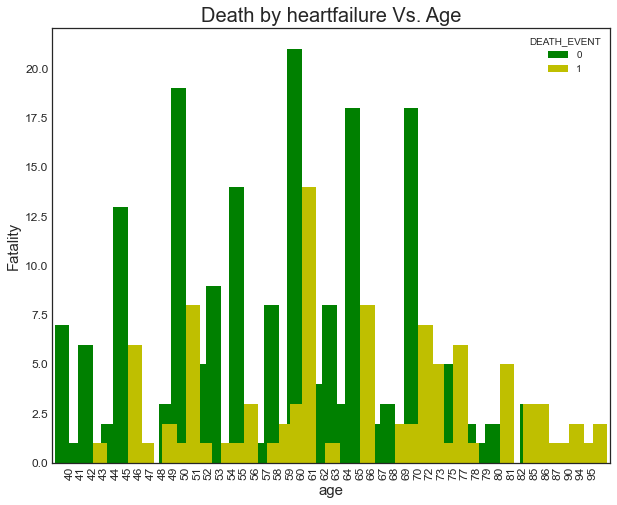

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
my_colors = list(islice(cycle(['g', 'y', 'g']), None, len(hf_df)))
plt.title('Death by heartfailure Vs. Age',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Fatality',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
pd.crosstab(hf_df.age,hf_df.DEATH_EVENT).plot(kind='bar',width=2.5,ax=ax,color=my_colors)

plt.savefig('HF_Ftl_age.png')

In [42]:
#Training K_Nearest_Neighbors model

y1 = hf_df["DEATH_EVENT"]
target_names = ["negative", "positive"]

In [43]:
x1 = hf_df.drop("DEATH_EVENT", axis=1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42)
#x1.head()

k: 1, Train/Test Score: 1.00/0.63
k: 3, Train/Test Score: 0.86/0.71
k: 5, Train/Test Score: 0.82/0.69
k: 7, Train/Test Score: 0.82/0.67
k: 9, Train/Test Score: 0.77/0.68
k: 11, Train/Test Score: 0.76/0.67
k: 13, Train/Test Score: 0.77/0.67


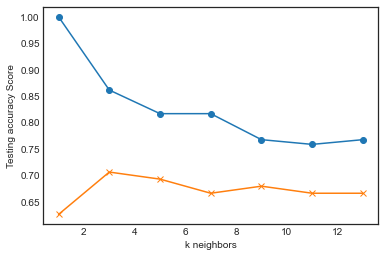

In [45]:
# Create a StandardScater model and fit it to the training data
x1_scaler = StandardScaler().fit(x1_train)
# Transform the training and testing data using the x_scaler and y_scaler models

x1_train_scaled = x1_scaler.transform(x1_train)
x1_test_scaled = x1_scaler.transform(x1_test)
# Loop through different k values to see which has the highest accuracy; Note: We only use odd numbers because we don't want any ties
knn_train_scores = []
knn_test_scores = []
for k in range(1, 15, 2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x1_train_scaled, y1_train)
    knn_train_score = knn_model.score(x1_train_scaled, y1_train)
    knn_test_score = knn_model.score(x1_test_scaled, y1_test)
    knn_train_scores.append(knn_train_score)
    knn_test_scores.append(knn_test_score)
    print(f"k: {k}, Train/Test Score: {knn_train_score:.2f}/{knn_test_score:.2f}")
    
    
plt.plot(range(1, 15, 2), knn_train_scores, marker='o')
plt.plot(range(1, 15, 2), knn_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")

plt.savefig('hf_knn-acc.png',bbox_inches='tight',format='png')
plt.show()
plt.show()

In [186]:
# Note that k: 11 seems to be the best choice for this dataset
knn_mdl = KNeighborsClassifier(n_neighbors=11)
knn_mdl.fit(x1_train_scaled, y1_train)
print("\n")
print("\n" + 'k=11 Accuracy of the KNN prediction: %.3f' % knn_mdl.score(x1_test_scaled, y1_test))




k=11 Accuracy of the KNN prediction: 0.667
